<a href="https://colab.research.google.com/github/Arun9438/assignment/blob/main/Assignment_Code_DS_AG_019_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.
'''Deep learning is a branch of machine learning that focuses on artificial neural networks with multiple layers capable of automatically
learning representations from data. It evolved from early perceptron models developed in the 1950s and 1960s, followed by the introduction
of backpropagation in the 1980s, which allowed networks to learn complex patterns. The rise of powerful GPUs, large datasets,
and new optimization methods in the 2000s led to today’s deep neural networks used in image recognition, natural language processing,
and speech recognition.
Unlike traditional machine learning, which relies on handcrafted features and shallow models, deep learning automatically extracts
hierarchical features directly from raw data, allowing it to handle unstructured data such as images, text, and audio more effectively.'''


'Deep learning is a branch of machine learning that focuses on artificial neural networks with multiple layers capable of automatically \nlearning representations from data. It evolved from early perceptron models developed in the 1950s and 1960s, followed by the introduction \nof backpropagation in the 1980s, which allowed networks to learn complex patterns. The rise of powerful GPUs, large datasets, \nand new optimization methods in the 2000s led to today’s deep neural networks used in image recognition, natural language processing, \nand speech recognition.\nUnlike traditional machine learning, which relies on handcrafted features and shallow models, deep learning automatically extracts \nhierarchical features directly from raw data, allowing it to handle unstructured data such as images, text, and audio more effectively.'

In [4]:
#Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?
'''A perceptron is the simplest form of a neural network consisting of a single neuron. It takes multiple input values,
 multiplies each by a corresponding weight, adds a bias term, and passes the sum through an activation (usually a step)
 function to produce an output.

f the activation function.
During training, the perceptron adjusts its weights based on errors between the predicted and actual outputs using the perceptron learning
rule.
Limitations:

It can only solve linearly separable problems (e.g., AND, OR) but fails on non-linear problems like XOR.

It provides hard outputs (0 or 1) without probability estimates.

It is sensitive to feature scaling and cannot model complex decision boundaries.'''

'A perceptron is the simplest form of a neural network consisting of a single neuron. It takes multiple input values,\n multiplies each by a corresponding weight, adds a bias term, and passes the sum through an activation (usually a step) \n function to produce an output.\n\nf the activation function.\nDuring training, the perceptron adjusts its weights based on errors between the predicted and actual outputs using the perceptron learning\nrule.\nLimitations:\n\nIt can only solve linearly separable problems (e.g., AND, OR) but fails on non-linear problems like XOR.\n\nIt provides hard outputs (0 or 1) without probability estimates.\n\nIt is sensitive to feature scaling and cannot model complex decision boundaries.'

In [5]:
#Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.
'''Activation functions introduce non-linearity into neural networks, enabling them to learn complex relationships between inputs and outputs.
Without activation functions, neural networks would behave like simple linear models.'''

'Activation functions introduce non-linearity into neural networks, enabling them to learn complex relationships between inputs and outputs. \nWithout activation functions, neural networks would behave like simple linear models.'

In [6]:
#Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.
'''A loss function measures the error for a single training example, whereas a cost function is the average of the loss values across
the entire training datase.'''


'A loss function measures the error for a single training example, whereas a cost function is the average of the loss values across \nthe entire training datase.'

In [7]:
#Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.
'''Optimizers adjust network weights to minimize the cost function, controlling how the model learns from data.

Gradient Descent: Updates weights using the average gradient of the cost function. It’s simple but slow for large datasets.
RMSprop: Uses a moving average of squared gradients to adapt learning rates per parameter, helping stabilize training.
Adam (Adaptive Moment Estimation): Combines momentum and RMSprop, maintaining both first (mean) and second (variance)
moments of gradients. It’s widely used for its speed and adaptive behavior.'''

'Optimizers adjust network weights to minimize the cost function, controlling how the model learns from data.\n\nGradient Descent: Updates weights using the average gradient of the cost function. It’s simple but slow for large datasets.\nRMSprop: Uses a moving average of squared gradients to adapt learning rates per parameter, helping stabilize training.\nAdam (Adaptive Moment Estimation): Combines momentum and RMSprop, maintaining both first (mean) and second (variance) \nmoments of gradients. It’s widely used for its speed and adaptive behavior.'

In [8]:
#Question 6: Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.
import numpy as np

# AND gate data
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([0,0,0,1], dtype=float)

# Add bias term
Xb = np.hstack([np.ones((X.shape[0],1)), X])

# Initialize weights and learning rate
w = np.zeros(Xb.shape[1])
lr = 0.1
epochs = 20

def step(z):
    return 1.0 if z >= 0 else 0.0

# Training
for _ in range(epochs):
    for xi, yi in zip(Xb, y):
        y_hat = step(xi @ w)
        w += lr * (yi - y_hat) * xi

print("Final weights:", w)
for xi in Xb:
    print("Input:", xi[1:].astype(int).tolist(), "->", "Pred:", int(step(xi @ w)))


Final weights: [-0.2  0.2  0.1]
Input: [0, 0] -> Pred: 0
Input: [0, 1] -> Pred: 0
Input: [1, 0] -> Pred: 0
Input: [1, 1] -> Pred: 1


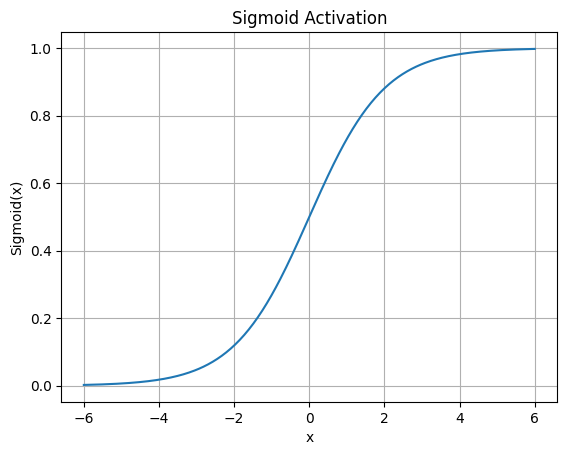

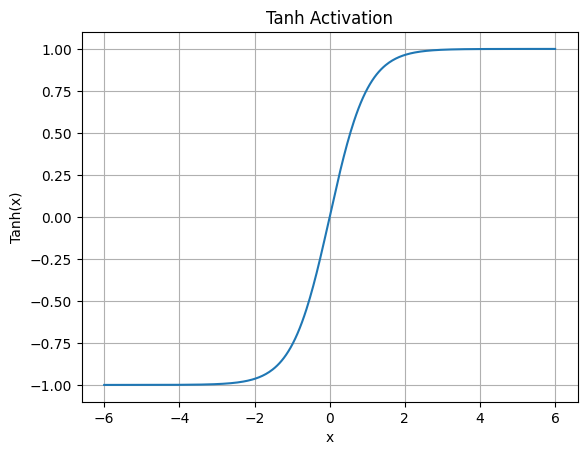

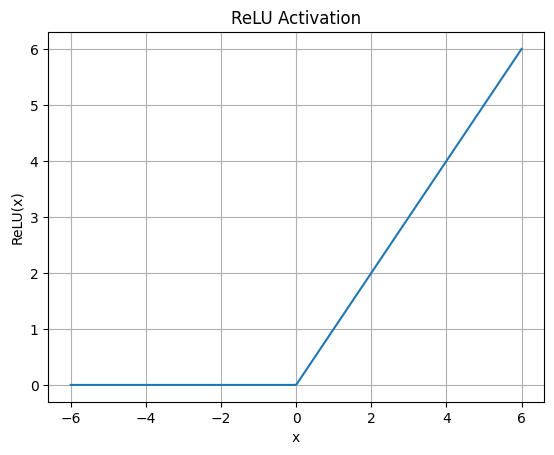

In [9]:
#Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(-6, 6, 400)

def sigmoid(x): return 1 / (1 + np.exp(-x))
def tanh(x): return np.tanh(x)
def relu(x): return np.maximum(0, x)

for fn, name in [(sigmoid, 'Sigmoid'), (tanh, 'Tanh'), (relu, 'ReLU')]:
    plt.figure()
    plt.plot(xs, fn(xs))
    plt.title(f'{name} Activation')
    plt.xlabel('x')
    plt.ylabel(f'{name}(x)')
    plt.grid(True)
    plt.show()


In [10]:
#Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Model architecture
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

print("Training Accuracy:", history.history['accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 - 5s - 11ms/step - accuracy: 0.9173 - loss: 0.2856 - val_accuracy: 0.9685 - val_loss: 0.1134
Epoch 2/5
422/422 - 4s - 8ms/step - accuracy: 0.9674 - loss: 0.1080 - val_accuracy: 0.9778 - val_loss: 0.0800
Epoch 3/5
422/422 - 4s - 9ms/step - accuracy: 0.9788 - loss: 0.0705 - val_accuracy: 0.9777 - val_loss: 0.0794
Epoch 4/5
422/422 - 3s - 7ms/step - accuracy: 0.9846 - loss: 0.0499 - val_accuracy: 0.9788 - val_loss: 0.0724
Epoch 5/5
422/422 - 6s - 13ms/step - accuracy: 0.9890 - loss: 0.0355 - val_accuracy: 0.9787 - val_loss: 0.0681
Training Accuracy: 0.9890000224113464


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
422/422 - 5s - 12ms/step - accuracy: 0.7776 - loss: 0.6288 - val_accuracy: 0.8503 - val_loss: 0.4114
Epoch 2/10
422/422 - 4s - 10ms/step - accuracy: 0.8444 - loss: 0.4348 - val_accuracy: 0.8647 - val_loss: 0.3649
Epoch 3/10
422/422 - 4s - 9ms/step - accuracy: 0.8557 - loss: 0.3964 - val_accuracy: 0.8663 - val_loss: 0.3572
Epoch 4/10
422/422 - 7s - 15ms/step - accuracy: 0.8628 - loss: 0.3722 - val_accuracy: 0.8620 - val_loss: 0.3594
Epoch 5/10
422/422 - 7s - 17ms/step - accuracy: 0.8707 - loss: 0.3543 - val_accuracy: 0.8738 - val_loss: 0.3359
Epoch 6/10
422/422 - 3s - 8ms/step - accuracy: 0.8750 - loss: 0.3413 - val_accuracy: 0.8738 - val_loss: 0.3425
Epoch 7/10
422/422 - 7s - 15ms/step - accuracy: 0.8788 - loss: 0.3272 - val_accuracy: 0.8752 - val_loss: 0.3275
Epoch 8/10
422/422 - 4s - 10ms

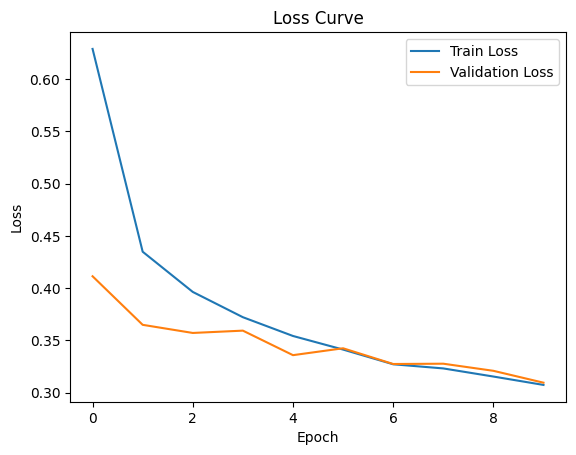

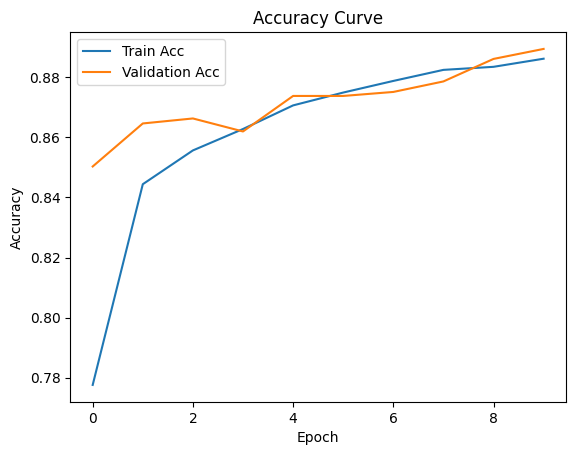

In [11]:
#Question 9: Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32')/255.0
x_test = x_test.reshape(-1, 28*28).astype('float32')/255.0

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=128, verbose=2)

# Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.title('Loss Curve'); plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.legend(); plt.title('Accuracy Curve'); plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.show()


In [ ]:
#Question 10: Fraud detection workflow for a bank’s large imbalanced dataset.
'''Model Design:
Use a multilayer feedforward neural network with input features representing transaction data. Example:
Input → Dense(128, ReLU) → Dropout → Dense(64, ReLU) → Dense(1, Sigmoid).
For categorical features (like Merchant ID), embeddings can be used.

Activation & Loss:
ReLU for hidden layers (faster training), Sigmoid for output (binary classification).
Loss function: Binary Cross-Entropy or Focal Loss for imbalanced data.

Training & Evaluation:

Use class weights or oversampling to handle imbalance.

Split data using stratified sampling.

Evaluate using AUC, Precision-Recall, and F1-score, not accuracy.

Apply early stopping and dropout to avoid overfitting.

Optimizer:
Use Adam or RMSprop for adaptive learning.
Regularization with L2 penalty, dropout layers, and early stopping ensures stability.

In summary:
Design a robust, well-regularized network that uses balanced sampling and advanced metrics for reliable fraud detection in real-world
conditions.'''